In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')

In [2]:
df = pd.read_csv('Artworks.csv')
df['DateAcquired'] = pd.to_datetime(df['DateAcquired'])

In [3]:
df.head()

,﻿Title,Artist,ArtistBio,Date,Medium,Dimensions,CreditLine,MoMANumber,Classification,Department,DateAcquired,CuratorApproved,ObjectID,URL
0,"Ferdinandsbrücke Project, Vienna, Austria , El...",Otto Wagner,"(Austrian, 1841–1918)",1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Fractional and promised gift of Jo Carole and ...,885.1996,A&D Architectural Drawing,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Gift of the architect in honor of Lily Auchinc...,1.1995,A&D Architectural Drawing,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Gift of Jo Carole and Ronald S. Lauder,1.1997,A&D Architectural Drawing,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Purchase and partial gift of the architect in ...,2.1995,A&D Architectural Drawing,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Gift of Jo Carole and Ronald S. Lauder,2.1997,A&D Architectural Drawing,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6


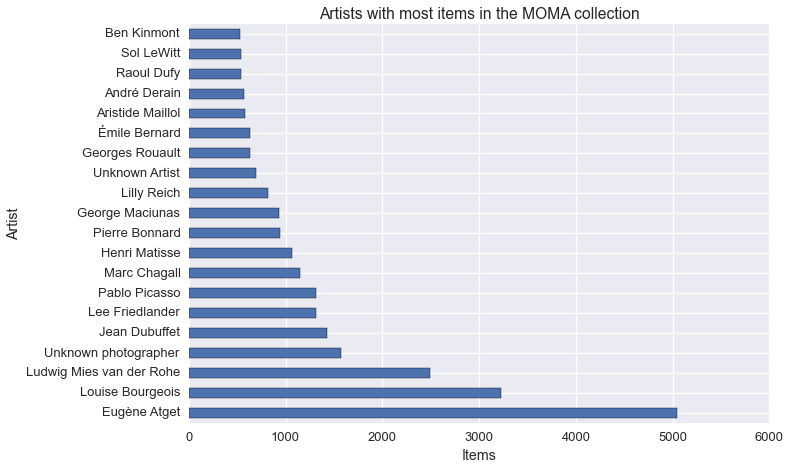

In [14]:
fig, ax = plt.subplots()
df[['Artist']].groupby(df['Artist']).count().sort('Artist', ascending=False).head(20).plot(kind='barh', ax=ax);
ax.set_title('Artists with most items in the MOMA collection')
ax.set_xlabel('Items')
ax.legend().remove()
fig.savefig('/Users/mike/Desktop/artists.png', bbox_inches='tight')

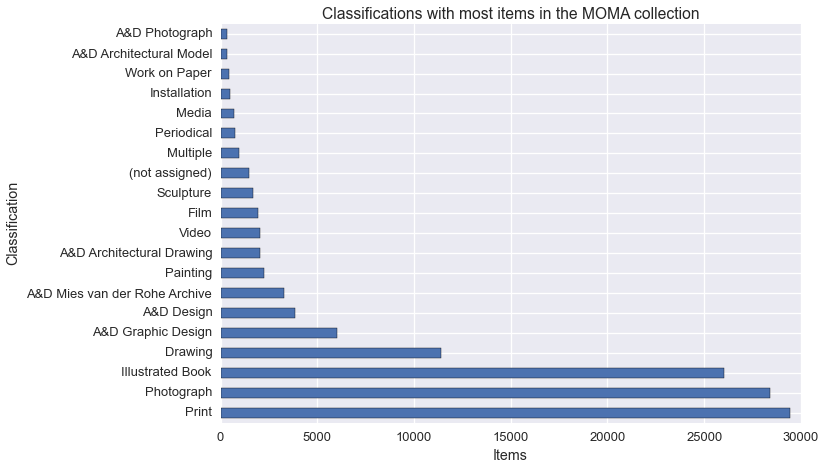

In [15]:
fig, ax = plt.subplots()
df[['Classification']].groupby(df['Classification']).count().sort('Classification', ascending=False).head(20).plot(kind='barh', ax=ax);
ax.set_title('Classifications with most items in the MOMA collection')
ax.set_xlabel('Items')
ax.legend().remove()
fig.savefig('/Users/mike/Desktop/classifcations.png', bbox_inches='tight')

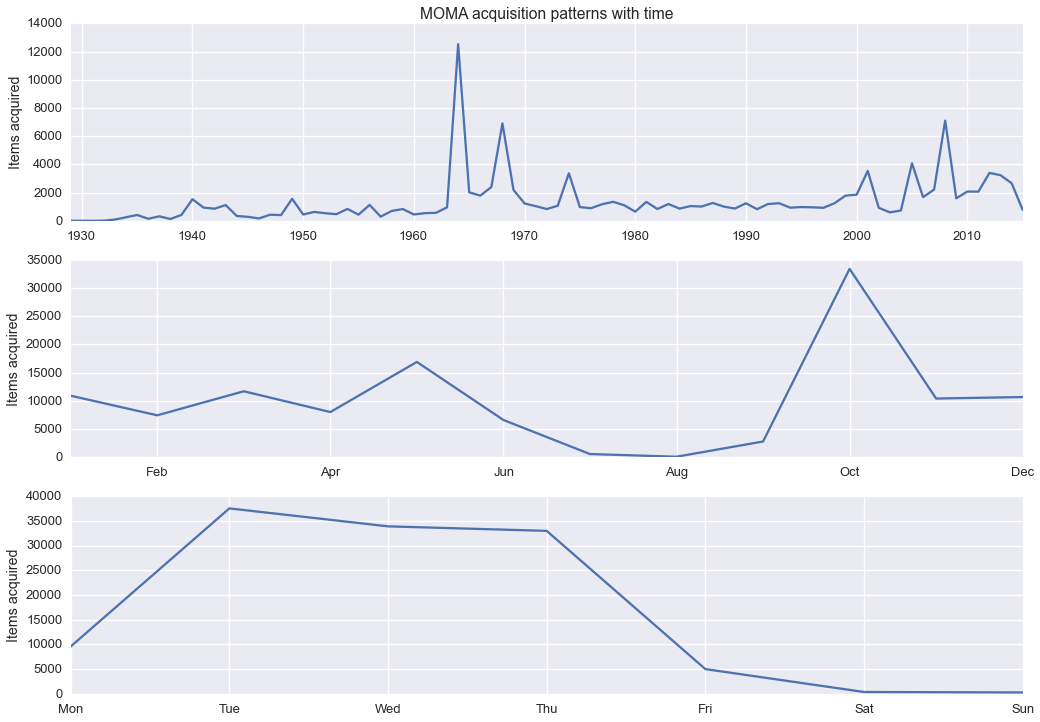

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(14, 10))
fig.tight_layout()

df[['ObjectID', 'DateAcquired']].set_index('DateAcquired').groupby(pd.TimeGrouper('A')).count().plot(ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Items acquired')
ax[0].legend().remove()
ax[0].set_title('MOMA acquisition patterns with time')

df.groupby(df['DateAcquired'].map(lambda x: x.month)).count()['ObjectID'].plot(ax=ax[1])
days = {0: 'Zero', 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ax[1].set_xticklabels([days[i] for i in ax[1].get_xticks()])
ax[1].set_xlabel('')
ax[1].set_ylabel('Items acquired')

df.groupby(df['DateAcquired'].map(lambda x: x.weekday())).count()['ObjectID'].plot(ax=ax[2])
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
ax[2].set_xticklabels([days[i] for i in ax[2].get_xticks()])
ax[2].set_xlabel('')
ax[2].set_ylabel('Items acquired');

fig.savefig('/Users/mike/Desktop/trends.png', bbox_inches='tight')

In [7]:
df.groupby(df['DateAcquired'].map(lambda x: x.weekday())).count()['ObjectID']

DateAcquired
0     9564
1    37511
2    33876
3    32961
4     4981
5      346
6      252
Name: ObjectID, dtype: int64

In [13]:
df[['ObjectID', 'DateAcquired']].set_index('DateAcquired').groupby(pd.TimeGrouper('A')).count().idxmax()

ObjectID   1964-12-31
dtype: datetime64[ns]

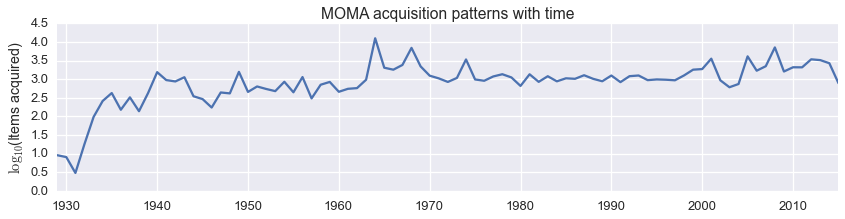

In [24]:
fig, ax = plt.subplots(figsize=(14, 3))

df[['ObjectID', 'DateAcquired']].set_index('DateAcquired').groupby(pd.TimeGrouper('A')).count().apply(np.log10).plot(ax=ax)
ax.set_xlabel('')
ax.set_ylabel(r'$\log_{10}$(Items acquired)')
ax.legend().remove()
ax.set_title('MOMA acquisition patterns with time')

fig.savefig('/Users/mike/Desktop/log-years.png', bbox_inches='tight')